In [92]:
from __future__ import annotations
import zipfile
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt
import tempfile
import plotly.express as px

In [93]:
import sys
sys.path.append('/Users/alex/Desktop/CS/Internships and Research/DBF/python_tools/')
from util.blackbox import decode_blackbox

In [94]:
MAIN_DIR = "/Users/alex/Desktop/CS/Internships and Research/DBF/python_tools/data/windTunnel/11_29_through_12_1_2023"
SUB_DIR = MAIN_DIR + "/12_1_2023"
THRUST_ZIP = SUB_DIR + "/Windtunnel.zip"
BLACKBOX_ZIP = SUB_DIR + "/Blackbox.zip"
OUTPUT_DIR = SUB_DIR + "/processed"

In [95]:
MIN_THROTTLE = 1065
MAX_THROTTLE = 2011

In [96]:
thrust_dfs: dict[str, pd.DataFrame] = {}

with zipfile.ZipFile(THRUST_ZIP) as z:
    for name in filter(lambda x: x.endswith(".csv") and not x.startswith('__MACOSX'), z.namelist()):
        data = z.read(name)
        df = pd.read_csv(StringIO(data.decode('utf-8')))
        df = df[df.CODE == 0]
        df.reset_index(inplace=True, drop=True) 
        thrust_dfs[name.replace("RUN1.csv", "").split("/")[1]] = df

In [97]:
thrust_sim_dfs: dict[str, pd.DataFrame] = {}
thrust_regular_dfs: dict[str, pd.DataFrame] = {}
for name, df in thrust_dfs.items():
    if 'M3' in name or 'M2' in name or 'max' in name:
        thrust_sim_dfs[name] = df
    else:
        thrust_regular_dfs[name] = df

In [98]:
thrust_sim_dfs.keys()

dict_keys(['AT7215_16x14_12S_M2_115Wh_45', 'AT7215_16x14_12S_M3_97.5Wh_40', 'AT7215_16x14_12S_M3_97.5Wh_30', 'AT7215_16x14_12S_M3_97.5Wh_35', 'AT7215_16x14_12S_M2_115Wh_40'])

In [99]:
thrust_regular_dfs.keys()

dict_keys(['AT7215_16x14_12S_115Wh_static'])

In [100]:
blackbox_sim_dfs: dict[str, pd.DataFrame] = {}
blackbox_regular_dfs: dict[str, pd.DataFrame] = {}

with zipfile.ZipFile(BLACKBOX_ZIP) as z:
    for name in filter(lambda x: x.endswith(".TXT") and not x.startswith('__MACOSX'), z.namelist()):
        with tempfile.TemporaryDirectory() as tmpdirname:
            z.extract(name, tmpdirname)
            df = decode_blackbox(tmpdirname + "/" + name)

        name = name.replace(".TXT", "").split("/")[-1]
        parts = name.split("_")
        mission = False
        if len(parts) == 6: # sim
            motor, prop, battery, mission, watthours, airspeed = parts
        elif len(parts) == 5: # regular
            motor, prop, battery, watthours, airspeed = parts
        elif len(parts) == 4:
            motor, prop, battery, airspeed = parts
            watthours = 'Unspecified'
            if 'max' in airspeed:
                mission = 'max'
        else:
            raise Exception("Unexpected number of nested directories: " + str(len(parts)))
        
        df.dropna(inplace=True, subset=['motor[0]'])
        df.rename(columns={"motor[0]": "throttle"}, inplace=True)
        df["motor"] = motor
        df["prop"] = prop
        df["battery"] = battery
        df["airspeed"] = airspeed
        if mission:
            df["mission"] = mission
            blackbox_sim_dfs[name] = df
        else:
            blackbox_regular_dfs[name] = df


Log 1 of 1, start 02:58.408, end 04:30.632, duration 01:32.223

Statistics
Looptime           1002 avg           91.5 std dev (9.1%)
I frames    2871  108.0 bytes avg   310131 bytes total
P frames   43010   72.4 bytes avg  3112939 bytes total
E frames       2    7.5 bytes avg       15 bytes total
S frames     613   41.9 bytes avg    25656 bytes total
Frames     45881   74.6 bytes avg  3423070 bytes total
Data rate  497Hz  45480 bytes/s     454800 baud

6 frames failed to decode, rendering 44 loop iterations unreadable. 125 iterations are missing in total (125ms, 0.14%)
46005 loop iterations weren't logged because of your blackbox_rate settings (46110ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0         107328  178408832  2041-06-28T01:06:58.408832Z            0   
1         107360  178440891  2041-06-28T01:06:58.440891Z            0   
2         107362  178442888  2041-06-28T01:06:58.442888Z            0   
3         107364  178444890  2041-06-28T01:06:58.444890Z            0   
4         107366  178446898  2041-06-28T01:06:58.446898Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         1         6        -1  ...   
1            0            0         0        -1        -6        -1  ...   
2            0            0         0        -1        -6        -1  ...   
3            0            0         0        -1        -6        -1  ...   
4            0            0         0        -1        -6        -1  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 02:34.120, end 03:52.536, duration 01:18.415

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames    2441  107.1 bytes avg   261333 bytes total
P frames   36568   72.5 bytes avg  2652246 bytes total
E frames       2    7.5 bytes avg       15 bytes total
S frames     496   41.6 bytes avg    20628 bytes total
Frames     39009   74.7 bytes avg  2913579 bytes total
Data rate  497Hz  37505 bytes/s     375100 baud

6 frames failed to decode, rendering 43 loop iterations unreadable. 126 iterations are missing in total (126ms, 0.16%)
39134 loop iterations weren't logged because of your blackbox_rate settings (39206ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0         135968  154120407  2041-06-28T01:06:34.120407Z            0   
1         136000  154152470  2041-06-28T01:06:34.152470Z            0   
2         136002  154154474  2041-06-28T01:06:34.154474Z            0   
3         136004  154156476  2041-06-28T01:06:34.156476Z            0   
4         136006  154158483  2041-06-28T01:06:34.158483Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0       -39  ...   
1            0            0         0         0         0       -39  ...   
2            0            0         0         0         0       -39  ...   
3            0            0         0         0         0       -39  ...   
4            0            0         0         0         0       -39  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 04:35.722, end 09:44.605, duration 05:08.882

Statistics
Looptime           1001 avg            1.7 std dev (0.2%)
I frames    9617  110.7 bytes avg  1064263 bytes total
P frames  144224   72.4 bytes avg 10434690 bytes total
E frames       2    8.0 bytes avg       16 bytes total
S frames    1887   41.0 bytes avg    77367 bytes total
Frames    153841   74.7 bytes avg 11498953 bytes total
Data rate  498Hz  40736 bytes/s     407400 baud

7 frames failed to decode, rendering 58 loop iterations unreadable. 309 iterations are missing in total (309ms, 0.10%)
154149 loop iterations weren't logged because of your blackbox_rate settings (154440ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0         252960  275722543  2041-06-28T01:08:35.722543Z            0   
1         252992  275754608  2041-06-28T01:08:35.754608Z            0   
2         252994  275756615  2041-06-28T01:08:35.756615Z            0   
3         252996  275758615  2041-06-28T01:08:35.758615Z            0   
4         252998  275760620  2041-06-28T01:08:35.760620Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0       -11  ...   
1            0            0         0         0         0       -11  ...   
2            0            0         0         0         0       -11  ...   
3            0            0         0         0         0       -11  ...   
4            0            0         0         0         0       -11  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 01:49.745, end 06:56.840, duration 05:07.095

Statistics
Looptime           1001 avg           50.2 std dev (5.0%)
I frames    9565  109.1 bytes avg  1043618 bytes total
P frames  143422   72.5 bytes avg 10399883 bytes total
E frames       2    7.5 bytes avg       15 bytes total
S frames    1522   41.0 bytes avg    62397 bytes total
Frames    152987   74.8 bytes avg 11443501 bytes total
Data rate  498Hz  40974 bytes/s     409800 baud

8 frames failed to decode, rendering 62 loop iterations unreadable. 252 iterations are missing in total (252ms, 0.08%)
153238 loop iterations weren't logged because of your blackbox_rate settings (153546ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0          83424  109745080  2041-06-28T01:05:49.745080Z            0   
1          83456  109777137  2041-06-28T01:05:49.777137Z            0   
2          83458  109779141  2041-06-28T01:05:49.779141Z            0   
3          83460  109781149  2041-06-28T01:05:49.781149Z            0   
4          83462  109783149  2041-06-28T01:05:49.783149Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0        -1  ...   
1            0            0         0         0         0        -1  ...   
2            0            0         0         0         0        -1  ...   
3            0            0         0         0         0        -1  ...   
4            0            0         0         0         0        -1  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 05:50.092, end 07:22.364, duration 01:32.271

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames     859  108.7 bytes avg    93413 bytes total
P frames   12736   72.3 bytes avg   921341 bytes total
E frames      18    9.8 bytes avg      176 bytes total
S frames     131   41.7 bytes avg     5466 bytes total
Frames     13595   74.6 bytes avg  1014754 bytes total
Data rate  147Hz  11110 bytes/s     111200 baud

3 frames failed to decode, rendering 15 loop iterations unreadable. 64907 iterations are missing in total (65031ms, 70.48%)
13593 loop iterations weren't logged because of your blackbox_rate settings (13618ms, 14.76%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0          16128  350092482  2041-06-28T01:09:50.092482Z            0   
1          16160  350124534  2041-06-28T01:09:50.124534Z            0   
2          16162  350126537  2041-06-28T01:09:50.126537Z            0   
3          16164  350128549  2041-06-28T01:09:50.128549Z            0   
4          16166  350130547  2041-06-28T01:09:50.130547Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0        -1  ...   
1            0            0         0         0         0        -1  ...   
2            0            0         0         0         0        -1  ...   
3            0            0         0         0         0        -1  ...   
4            0            0         0         0         0        -1  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 04:35.722, end 09:44.605, duration 05:08.882

Statistics
Looptime           1001 avg            1.7 std dev (0.2%)
I frames    9617  110.7 bytes avg  1064263 bytes total
P frames  144224   72.4 bytes avg 10434690 bytes total
E frames       2    8.0 bytes avg       16 bytes total
S frames    1887   41.0 bytes avg    77367 bytes total
Frames    153841   74.7 bytes avg 11498953 bytes total
Data rate  498Hz  40736 bytes/s     407400 baud

7 frames failed to decode, rendering 58 loop iterations unreadable. 309 iterations are missing in total (309ms, 0.10%)
154149 loop iterations weren't logged because of your blackbox_rate settings (154440ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0         252960  275722543  2041-06-28T01:08:35.722543Z            0   
1         252992  275754608  2041-06-28T01:08:35.754608Z            0   
2         252994  275756615  2041-06-28T01:08:35.756615Z            0   
3         252996  275758615  2041-06-28T01:08:35.758615Z            0   
4         252998  275760620  2041-06-28T01:08:35.760620Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0       -11  ...   
1            0            0         0         0         0       -11  ...   
2            0            0         0         0         0       -11  ...   
3            0            0         0         0         0       -11  ...   
4            0            0         0         0         0       -11  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125

In [101]:
blackbox_sim_dfs.keys()

dict_keys(['AT7215_16x14_12S_M2_115Wh_40', 'AT7215_16x14_12S_M2_115Wh_45', 'AT7215_16x14_12S_M3_97.5Wh_40', 'AT7215_16x14_12S_M3_97.5Wh_30', 'AT7215_16x14_12S_M3_97.5Wh_35'])

In [102]:
blackbox_regular_dfs.keys()

dict_keys(['AT7215_16x14_12S_115Wh_static'])

In [103]:
# find non common df names
thrust_only_dfs = set(thrust_regular_dfs.keys()).difference(set(blackbox_regular_dfs.keys()))
print(thrust_only_dfs)

blackbox_only_dfs = set(blackbox_regular_dfs.keys()).difference(set(thrust_regular_dfs.keys()))
print(blackbox_only_dfs)

set()
set()


In [104]:
# find non common df names
thrust_only_dfs = set(thrust_sim_dfs.keys()).difference(set(blackbox_sim_dfs.keys()))
print(thrust_only_dfs)

blackbox_only_dfs = set(blackbox_sim_dfs.keys()).difference(set(thrust_sim_dfs.keys()))
print(blackbox_only_dfs)

set()
set()


In [105]:
# find common df names
common_regular_dfs = set(thrust_regular_dfs.keys()).intersection(set(blackbox_regular_dfs.keys()))
print(common_regular_dfs)

{'AT7215_16x14_12S_115Wh_static'}


In [106]:
# find common df names
common_sim_dfs = set(thrust_sim_dfs.keys()).intersection(set(blackbox_sim_dfs.keys()))
print(common_sim_dfs)

{'AT7215_16x14_12S_M2_115Wh_45', 'AT7215_16x14_12S_M3_97.5Wh_30', 'AT7215_16x14_12S_M3_97.5Wh_40', 'AT7215_16x14_12S_M2_115Wh_40', 'AT7215_16x14_12S_M3_97.5Wh_35'}


In [107]:
for name in common_regular_dfs:
    print(name)
    df = blackbox_regular_dfs[name][['throttle', 'escRPM', 'amperage (A)', 'vbat (V)']].copy()
    metadata = blackbox_regular_dfs[name][['motor', 'prop', 'battery', 'airspeed']].iloc[0]
    bins = df['throttle'].index[(df['throttle'] - df['throttle'].shift(1)).apply(lambda x: x > 20)].tolist()
    # df.plot()
    # for x in bins:
    #     plt.axvline(x = x, color = 'b', label = 'axvline - full height')
    df['throttle_group'] = pd.qcut(df["throttle"], q=[0] + [val / len(df["throttle"]) for val in bins] + [1], labels=list(map(str, bins)) + ["max"])
    df = df.groupby('throttle_group').mean()
    df.reset_index(inplace=True)
    df.drop(columns=['throttle_group'], inplace=True)

    df_thrust = thrust_dfs[name][['DYNAMIC PRESSURE', 'Lift', 'Drag']]
    df_thrust['thrust'] = -df_thrust['Drag']

    df = df.join(df_thrust)
    df["percent_throttle"] = (df["throttle"] - MIN_THROTTLE) / (MAX_THROTTLE - MIN_THROTTLE) * 100
    df["motor"] = metadata["motor"]
    df["prop"] = metadata["prop"]
    df["battery"] = metadata["battery"]
    df["airspeed"] = metadata["airspeed"]

    df.to_csv(OUTPUT_DIR + "/" + name + ".csv", index=False)

AT7215_16x14_12S_115Wh_static


/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/1742915733.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AT7215_16x14_12S_M2_115Wh_45
AT7215_16x14_12S_M3_97.5Wh_30


/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/2673803571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/2673803571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AT7215_16x14_12S_M3_97.5Wh_40
AT7215_16x14_12S_M2_115Wh_40


/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/2673803571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/2673803571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AT7215_16x14_12S_M3_97.5Wh_35


/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_65473/2673803571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



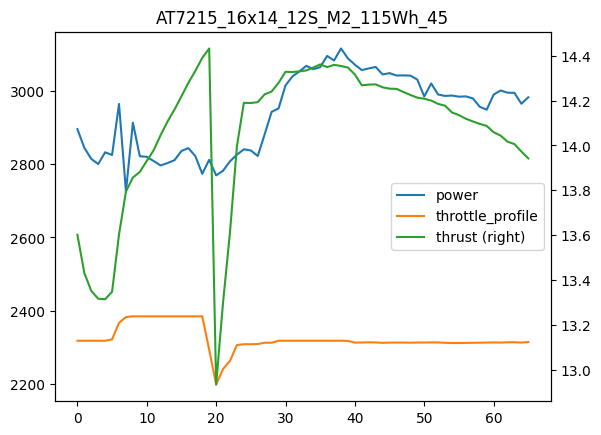

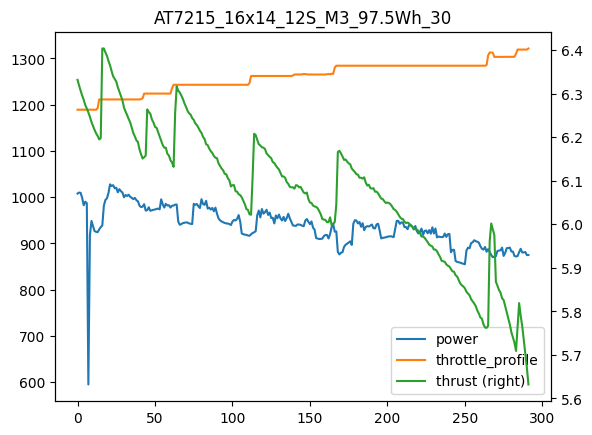

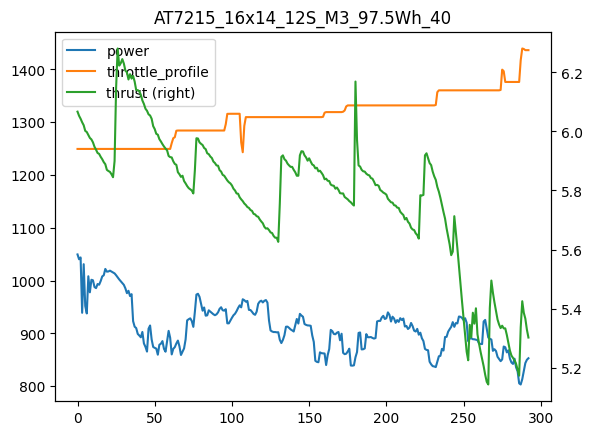

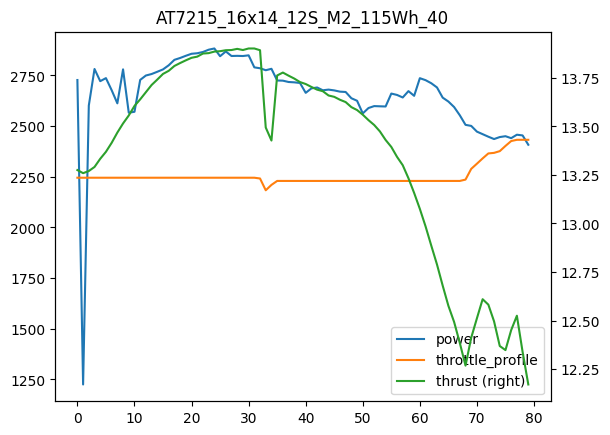

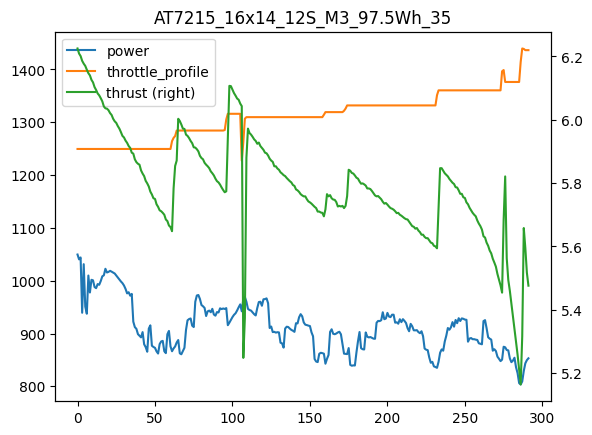

In [108]:
pd.options.plotting.backend = "matplotlib"
for name in common_sim_dfs:
    print(name)
    df_thrust = thrust_sim_dfs[name][['DYNAMIC PRESSURE', 'Lift', 'Drag']]
    df_thrust['thrust'] = -df_thrust['Drag']

    df = blackbox_sim_dfs[name][['throttle', 'escRPM', 'amperage (A)', 'vbat (V)', 'time (us)']].copy()
    metadata = blackbox_sim_dfs[name][['motor', 'prop', 'battery', 'airspeed']].iloc[0]

    timesteps = len(df_thrust['Drag'])
    df['time (s)'] = (df['time (us)'] - df['time (us)'].min()) / (df['time (us)'].max() - df['time (us)'].min()) * timesteps
    df['time (s)'] = pd.cut(df["time (s)"], timesteps)
    df = df.groupby('time (s)').mean()
    df.reset_index(inplace=True)
    df.drop(columns=['time (us)'], inplace=True)

    df = df.join(df_thrust)
    df["percent_throttle"] = (df["throttle"] - MIN_THROTTLE) / (MAX_THROTTLE - MIN_THROTTLE) * 100
    df["motor"] = metadata["motor"]
    df["prop"] = metadata["prop"]
    df["battery"] = metadata["battery"]
    df["airspeed"] = metadata["airspeed"]
    df['power'] = df['vbat (V)'] * df['amperage (A)']

    # smoothen out power data with a rolling average of 50 data points
    smooth = df['power'].rolling(10).mean()
    # find list where data deviates from the rolling average by more than 1%
    outliers = df.index[abs(df['power'] - smooth) > 0.01 * smooth]
    # replace only data that deviates from the rolling average by more than 1%
    df.loc[outliers, 'power'] = smooth
    # # replace with average of point before and after
    # try:
    #     df.loc[outliers, 'power'] = (df.loc[outliers - 1, 'power'] + df.loc[outliers + 1, 'power']) / 2
    # except:
    #     pass

    # drop the last 10 rows because that's when the motor is being turned off
    df.drop(df.tail(10).index,inplace=True)

    df.to_csv(OUTPUT_DIR + "/" + name + ".csv", index=False)

    df['throttle_profile'] = df['percent_throttle'] * 30
    df[['power', 'throttle_profile']].plot(legend=True)
    df['thrust'].plot(secondary_y=True, legend=True)
    plt.xlabel("Time (1 autoclick ~ 1s)")
    plt.title(name)
    plt.savefig(f'{OUTPUT_DIR}/{name}.png')

    pd.options.plotting.backend = "plotly"
    ax = df[['power', 'percent_throttle', 'thrust']].plot()
    ax.write_html(f'{OUTPUT_DIR}/{name}.html')
    pd.options.plotting.backend = "matplotlib"